### Stock Recommendation System with Reinforcement Learning - Appendix

Plot for Appendix section A

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_csv("data.csv")

In [ ]:
# Stock categories
blue_chip_stocks = ["AAPL", "MSFT", "JNJ", "V", "JPM", "PG", "UNH", "HD", "XOM", "KO"]
growth_stocks = ["TSLA", "NVDA", "AMZN", "META", "SHOP", "NFLX", "AMD", "CRWD", "DDOG", "PLTR"]
midcap_tech = ["UBER", "ABNB", "ROKU", "ZS", "OKTA", "SNOW", "MDB", "NET", "DOCU", "BILL"]
dividend_value = ["T", "VZ", "PFE", "CVX", "WMT", "MCD", "PEP", "MMM", "IBM", "KO"]
cyclical_industrials = ["CAT", "DE", "BA", "HON", "GE", "F", "GM", "LMT", "NOC", "UPS"]

# Initial style mapping
raw_styles = {
    "growth": growth_stocks + ["GE", "F", "GM"],
    "value": blue_chip_stocks + ["CAT", "HON"],
    "conservative": dividend_value + ["MMM", "UPS"],
    "trader": midcap_tech + ["DE", "BA", "LMT", "NOC"]
}

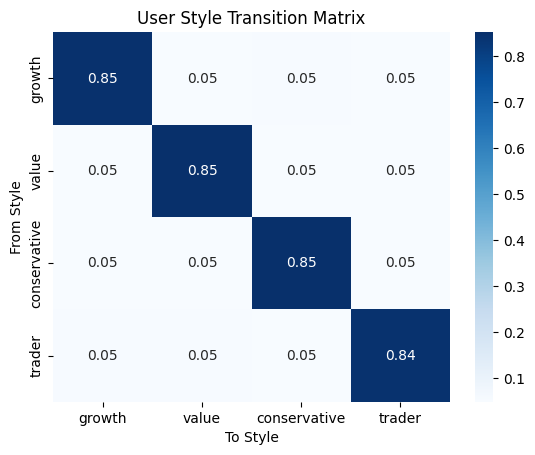

In [ ]:
# -----------------------------
# User Style Transition Matrix
# -----------------------------
df_sorted = df.sort_values(["User_ID", "Step"])
style_transitions = df_sorted.groupby("User_ID")["Style"].apply(lambda x: list(zip(x[:-1], x[1:])))
all_transitions = [pair for sublist in style_transitions for pair in sublist]

style_labels = list(raw_styles.keys())
transition_matrix = pd.DataFrame(0, index=style_labels, columns=style_labels)
for src, tgt in all_transitions:
    transition_matrix.loc[src, tgt] += 1
    
transition_matrix_pct = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

sns.heatmap(transition_matrix_pct, annot=True, fmt=".2f", cmap="Blues")
plt.title("User Style Transition Matrix")
plt.ylabel("From Style")
plt.xlabel("To Style")
plt.show()